# Diabetes Prediction

1) Importing the necessary python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None

2) Importing the dataset

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploratory Data Analysis

3) Data Cleaning

In [6]:
data.columns.isnull().sum()

0

In [7]:
data['Outcome'].value_counts()/len(data)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [8]:
Numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

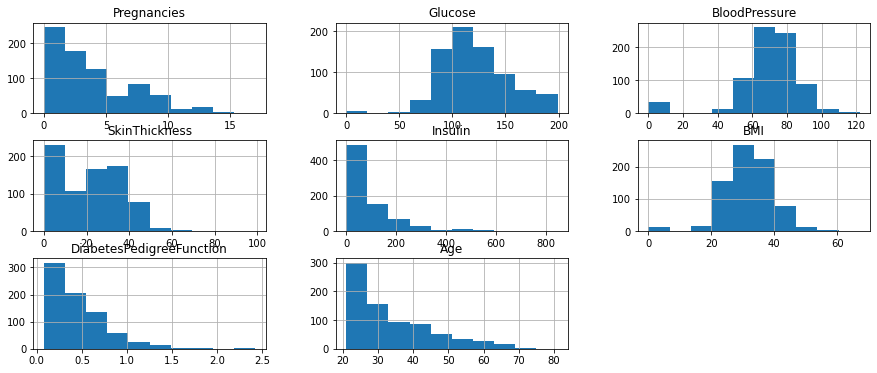

In [9]:
data[Numerical_columns].hist(bins = 10, figsize = (15,6));

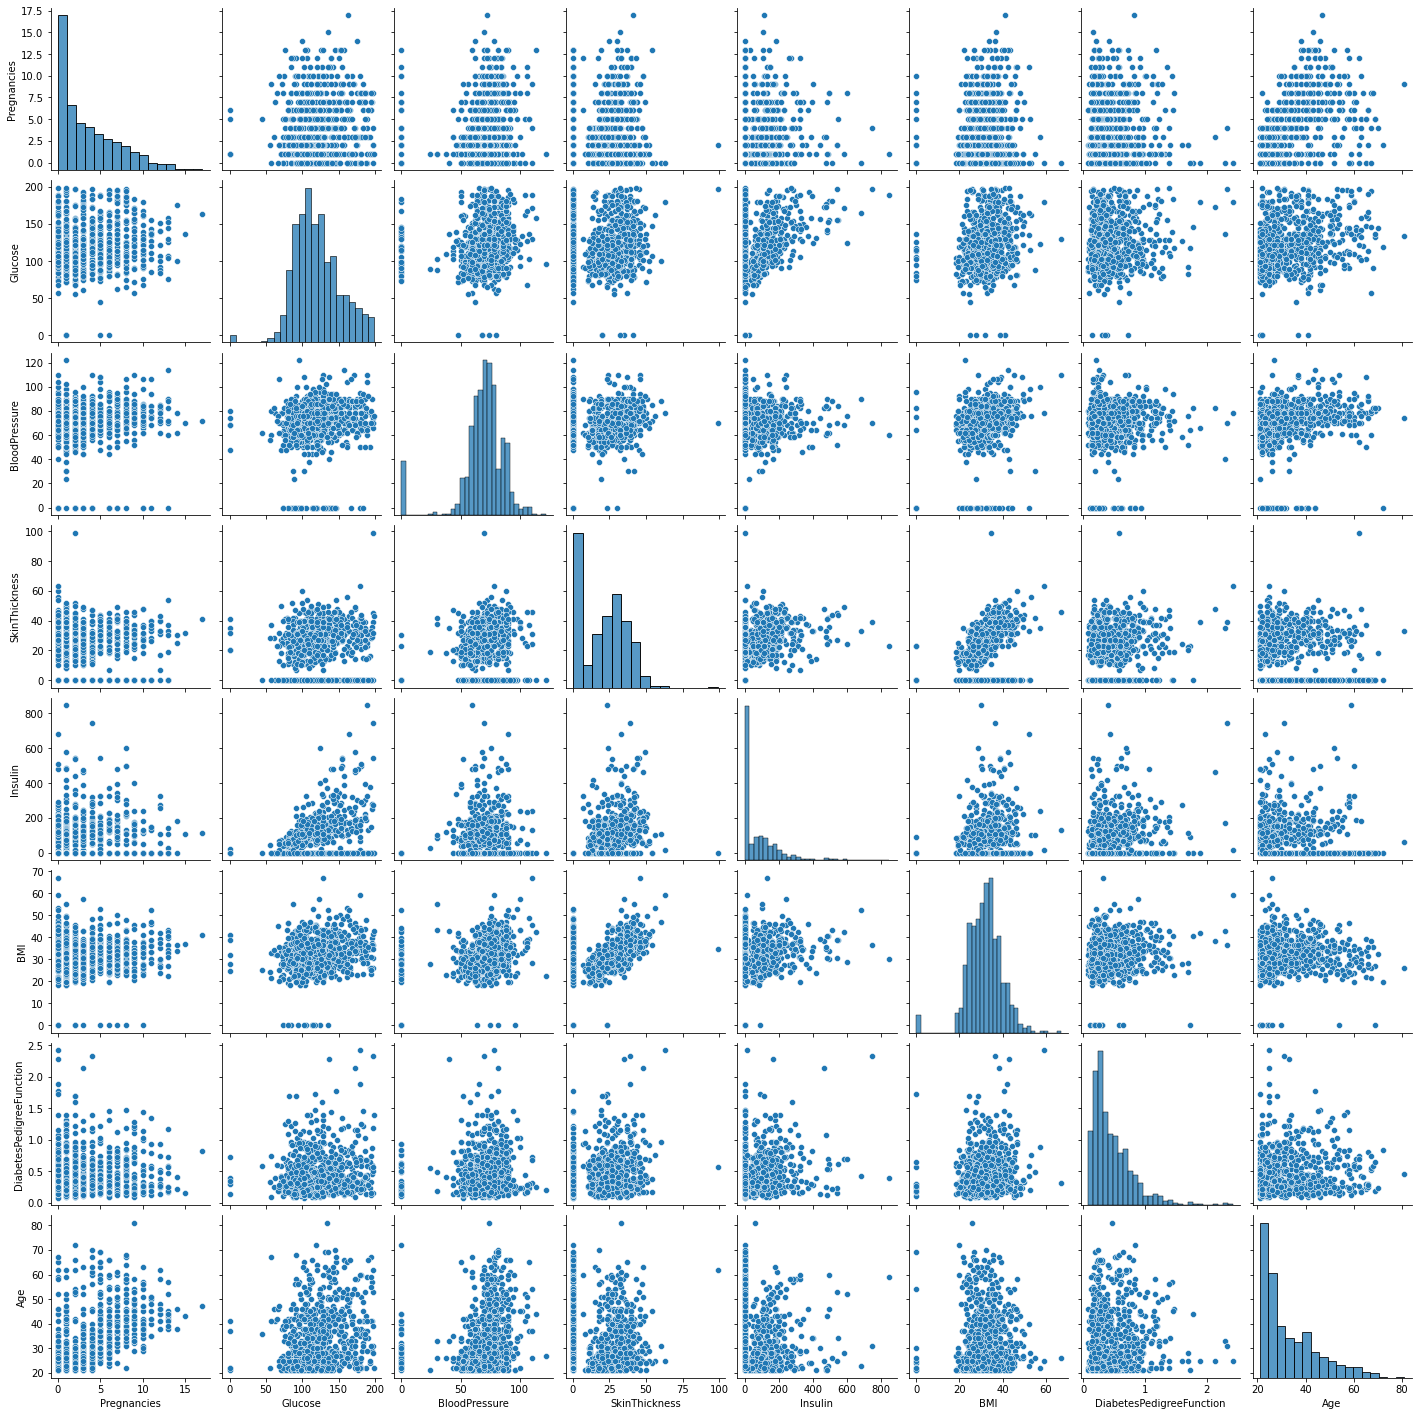

In [10]:
pairplot = data[Numerical_columns]
sns.pairplot(pairplot)

4) Treating the Outliers

Pregnancies                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
Glucose                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
BloodPressure                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
SkinThickness                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Insulin                        AxesSubplot(0.125,0.518913;0.168478x0.16413)
BMI                         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DiabetesPedigreeFunction    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Age                         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

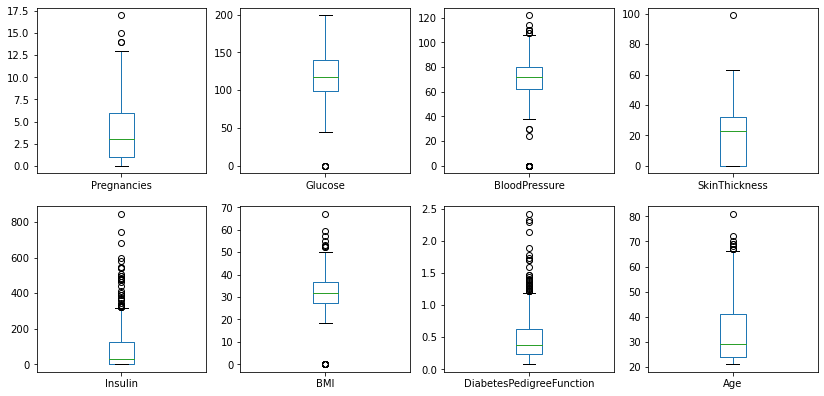

In [11]:
data[Numerical_columns].plot(kind = 'box', subplots = 'True',
                                 layout = (4,4),fontsize = 10,figsize = (14,14))

In [12]:
def cap_data(data):
    for col in Numerical_columns:
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.25,0.75]).values
            iqr = percentiles[1]-percentiles[0]
            upper_limit = percentiles[1] + 1.5*iqr
            lower_limit = percentiles[0] -1.5*iqr
            data[col][data[col] <= percentiles[0]] = lower_limit
            data[col][data[col] >= percentiles[1]] = upper_limit
        else:
            data[col]=data[col]
    return data

cap_data(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,13.5,202.125,72,80,-190.875,33.60,1.200,66.5,1
1,-6.5,37.125,66,29,-190.875,13.35,0.351,31.0,0
2,13.5,202.125,64,-48,-190.875,13.35,1.200,32.0,1
3,-6.5,37.125,66,23,94.000,28.10,-0.330,-1.5,0
4,-6.5,137.000,35,80,318.125,50.55,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,13.5,101.000,76,80,318.125,32.90,-0.330,66.5,0
764,2.0,122.000,70,27,-190.875,50.55,0.340,27.0,0
765,5.0,121.000,72,23,112.000,13.35,0.245,30.0,0
766,-6.5,126.000,35,-48,-190.875,30.10,0.349,66.5,1


Pregnancies                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
Glucose                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
BloodPressure                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
SkinThickness                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Insulin                        AxesSubplot(0.125,0.518913;0.168478x0.16413)
BMI                         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DiabetesPedigreeFunction    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Age                         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

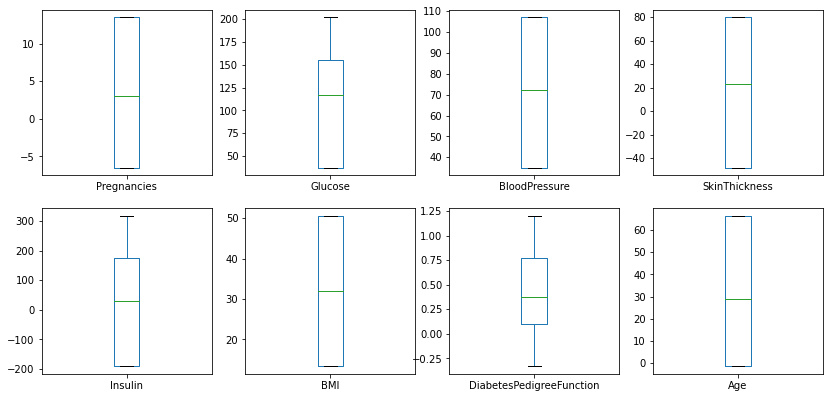

In [13]:
data[Numerical_columns].plot(kind = 'box', subplots = 'True',
                                 layout = (4,4),fontsize = 10,figsize = (14,14))

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.054036,118.144043,71.636719,18.010417,7.153320,31.915299,0.413730,30.551432,0.348958
std,7.806577,59.300407,26.109978,49.095016,211.833256,13.336844,0.547537,25.100287,0.476951
min,-6.500000,37.125000,35.000000,-48.000000,-190.875000,13.350000,-0.330000,-1.500000,0.000000
25%,-6.500000,37.125000,35.000000,-48.000000,-190.875000,13.350000,0.100500,-1.500000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,13.500000,155.531250,107.000000,80.000000,174.781250,50.550000,0.769500,66.500000,1.000000
max,13.500000,202.125000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [15]:
X = data.drop(columns = ['Outcome'])
Y = data['Outcome']

5) Scaling the Dataset

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

6) Treating Multicollinearity

In [17]:
corr_matrix = X.corr()
corr_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.142069,0.145615,-0.100834,-0.123861,0.007127,-0.011916,0.563168
Glucose,0.142069,1.000000,0.227260,0.035919,0.197412,0.216758,0.093627,0.263246
BloodPressure,0.145615,0.227260,1.000000,0.091779,-0.008057,0.286807,0.043245,0.303997
SkinThickness,-0.100834,0.035919,0.091779,1.000000,0.579186,0.343473,0.162130,-0.118038
Insulin,-0.123861,0.197412,-0.008057,0.579186,1.000000,0.175972,0.205040,-0.119848


<AxesSubplot:>

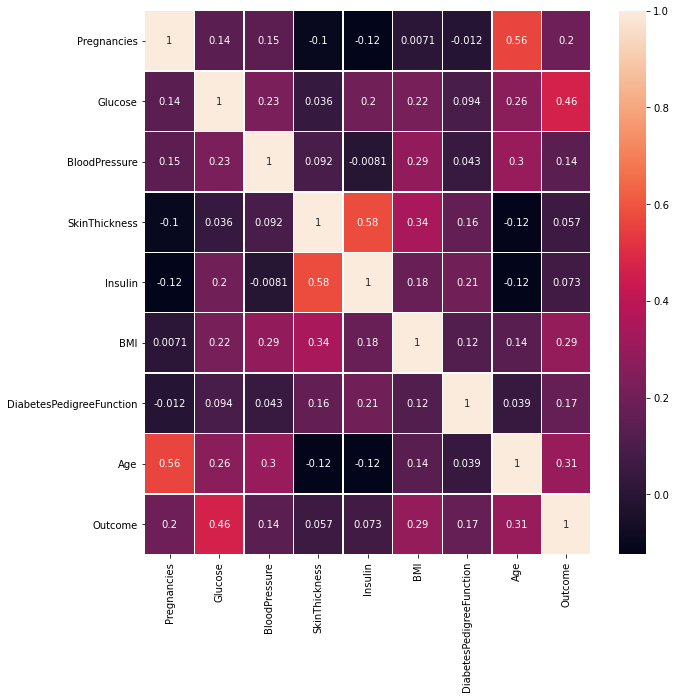

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, linewidths = .5)

# Splitting the Dataset

In [19]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train, Y_test = tts(scaled_X, Y, train_size = 0.7,stratify = None)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((537, 8), (231, 8), (537,), (231,))

# Classification Models

1) Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [21]:
classifier.fit(X_train, Y_train)


LogisticRegression(class_weight='balanced')

In [22]:
predicted_values = classifier.predict(X_test)
predicted_probabilities = classifier.predict_proba(X_test)

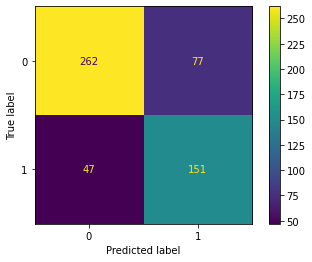

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_train, Y_train)  
plt.show()  

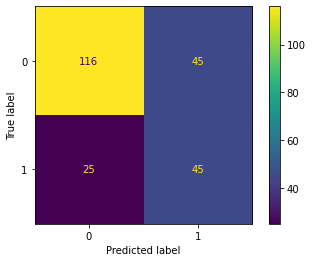

In [24]:
plot_confusion_matrix(classifier,X_test,Y_test)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,predicted_values)
accuracy

0.696969696969697

In [26]:
from sklearn.metrics import classification_report
k = classification_report(Y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       161
           1       0.50      0.64      0.56        70

    accuracy                           0.70       231
   macro avg       0.66      0.68      0.67       231
weighted avg       0.72      0.70      0.71       231



In [27]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points = precision_recall_curve(Y_test,
                                                                        predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((202,), (202,), (201,))

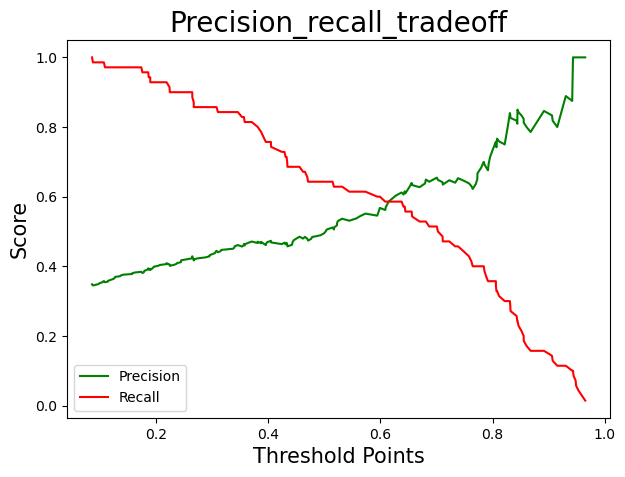

In [28]:
plt.figure(figsize = (7,5),dpi = 100)
plt.plot(threshold_points,precision_points[:-1],color = 'green',label = 'Precision')
plt.plot(threshold_points, recall_points[:-1],color = 'red',label = 'Recall')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.title('Precision_recall_tradeoff',fontsize = 20)
plt.legend()

In [29]:
#aoc_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold = roc_curve(Y_test,predicted_probabilities[:,-1])

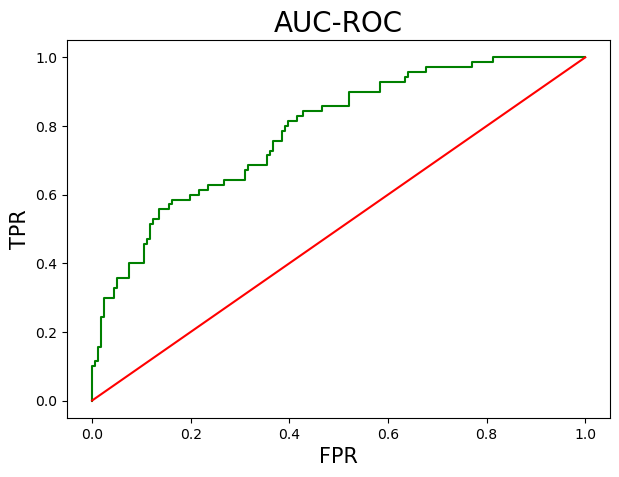

0.784826974267968

In [30]:
plt.figure(figsize = (7,5),dpi = 100)
plt.plot(fpr,tpr, color = 'green')
plt.plot([0,1],[0,1],label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(Y_test,predicted_probabilities[:,1])

In [31]:
#coefficient plot
c = classifier.coef_.reshape(-1)
x = X.columns
coeff_plot = pd.DataFrame({
    'coefficients':c,
    'variables':x,
    })
#sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variables
4,-0.148490,Insulin
2,-0.091168,BloodPressure
3,-0.019928,SkinThickness
0,0.278092,Pregnancies
6,0.403584,DiabetesPedigreeFunction


Text(0.5, 1.0, 'Coefficients plot')

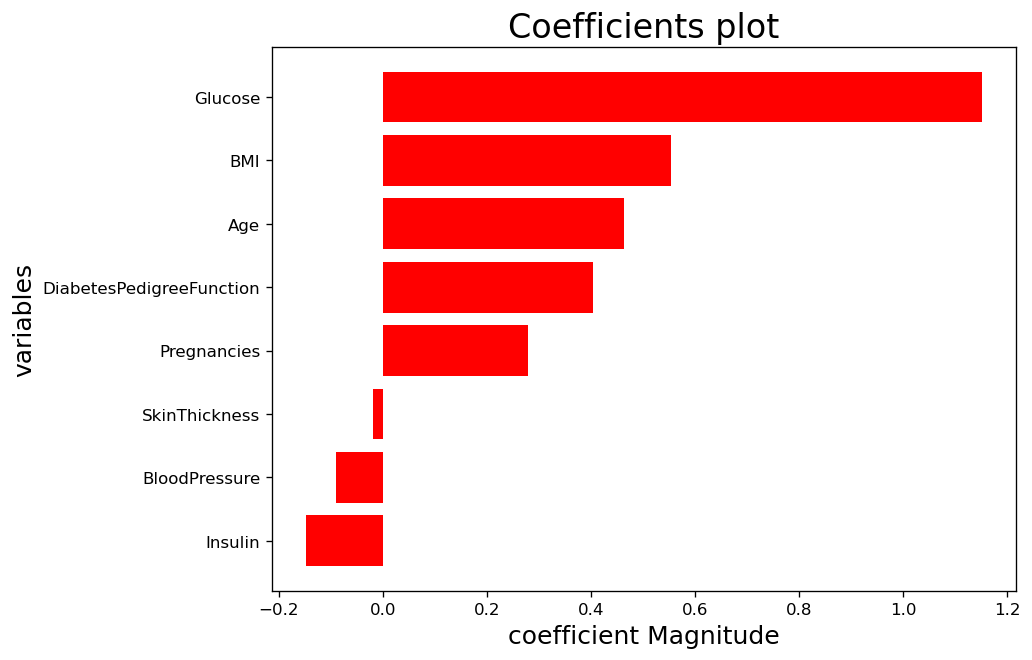

In [32]:
plt.figure(figsize = (8,6),dpi = 120)
plt.barh(coeff_plot['variables'],coeff_plot['coefficients'],color = 'red')
plt.xlabel('coefficient Magnitude',fontsize = 15)
plt.ylabel('variables',fontsize = 15)
plt.title('Coefficients plot',fontsize = 20)

2) Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, Y_train)
y_pred2 = rfc.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred2)
accuracy

0.7402597402597403

In [35]:
from sklearn.metrics import classification_report
k = classification_report(Y_test,y_pred2)
print(k)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       161
           1       0.57      0.60      0.58        70

    accuracy                           0.74       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred3)
accuracy

NameError: name 'y_pred3' is not defined

3) K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, Y_train)

y_pred3 = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred4)
accuracy

In [ ]:
from sklearn.metrics import classification_report
k = classification_report(Y_test,y_pred3)
print(k)

4) Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, Y_train)
y_pred4 = svc_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
k = classification_report(Y_test,y_pred4)
print(k)

On comparing all these models it is found that the support vector machine model predicts most precisely with a recall score of (0.83,0.64)